# Bank customers Churn Prediction
*by: Gopesh Khandelwal*

## <span style="color:blue">Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## <span style="color:blue">Importing necessary libraries

In [ ]:
!pip install scikit-learn==1.2.2

In [ ]:
!pip install keras==2.12.0

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score
from sklearn.model_selection import GridSearchCV

import random

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

import warnings
warnings.filterwarnings('ignore')

* Libraries successfully loaded.

In [ ]:
# Preventing scientific notation.}
pd.set_option("display.float_format", lambda x: "%.3f" % x)

* Code ran to block scientific notation.

## <span style="color:blue">Loading the dataset

In [ ]:
# Importing and mounting google drive to access the data in colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Saving the path of the .csv file.
path = '/content/drive/MyDrive/Churn.csv'
# Creating the data frame, data, to load the .csv to the notebook
data = pd.read_csv(path)
# Creating copy of the data frame, df, to keep the original data unaltered.
df = data.copy()

NameError: name 'pd' is not defined

* Data loaded and data frame created.

## <span style="color:blue">Data Overview

In [ ]:
# Shape of the data frame.
df.shape

(10000, 14)

* Observed shape of data frame.

In [ ]:
# First 5 rows of the data frame.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


* Observed first 5 rows of data frame.

In [ ]:
# Last 5 rows of the data frame.
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


* Observed last 5 rows of data frame.

In [ ]:
# Information about the data frame's columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* Observed data types of the columns.
* Observed no null values present in the data set.
* All the columns except Surname, Geography, and Gender are of numerical data types.

In [ ]:
# Checking the data frame for duplicate values.
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

* Observed no duplicate values in the data set.

In [ ]:
# Checking the data frame for na values.
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* Observed no null values present in the data set.

In [ ]:
# Statistical summary of the columns with data type of "Int64" and "Float64".
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


* Observed statistical summary of numerical data.

In [ ]:
# Statistical summary of the columns with data type of "object".
df.describe(include=["object"]).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


* Observed statistical summary of columns with data type object.

In [ ]:
# Checking the percentages of classes in the target variable column.
df['Exited'].value_counts(1)

Exited
0   0.796
1   0.204
Name: proportion, dtype: float64

* Observed class percentages in target vaiable column.

In [ ]:
# Dropping "RowNumber", "CustomerId", & "Surname" columns beacuse they are unnecessary information for analysis.
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

* Dropped unnecessary columns ("RowNumber", "CustomerId", & "Surname").

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* Observed columns were successfully dropped.

In [ ]:
# Top 5 rows of the new data frame.
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


* Observed first 5 rows of new data frame.

In [ ]:
# Creating a list with column labels that need to be converted from "object" to "category" data type.
cat_cols = [
    'Geography',
    'Gender'
]

# Converting the columns with "object" data type to "category" data type.
df[cat_cols] = df[cat_cols].astype('category')

* Converting columns with object data type to categorical data type.

In [ ]:
# Observing the data types of the new data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


* Observed the data types were successfully changed to categorical.

## <span style="color:blue">Exploratory Data Analysis

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

**Answers**:

1.   * Customer's `CreditScore` has a mean value of about 650, with a mean very slightly lower than that.
     * The data is normally distributed with a slight left skew due to outliers.
     * There is a larger than expected amount of customers with the maximum credit score.

2.  * There are 5151 customers that the bank considers active users.

3.  * Most customer attributes do not have significant correlation.
    * There is some slight positive correlation between `Age` and `Exited`.
    * There is some slight negative correlation between `Balance` and `NumOfProducts`.

4. * Females are churning more often than males, although both are relatively similar.

5. * Customers located in Germany churn about twice as often as customers located in other France or Spain.





### Functions to use for EDA

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

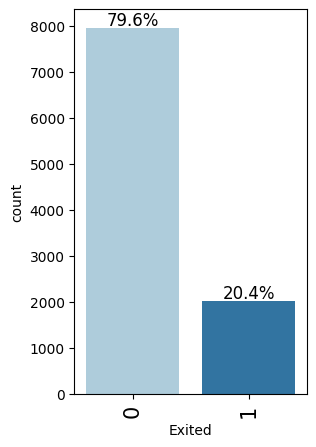

In [ ]:
# Target variable
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, "Exited", perc=True)

* 79% of customers are existing customers.
* 20% of custsomers have exited.

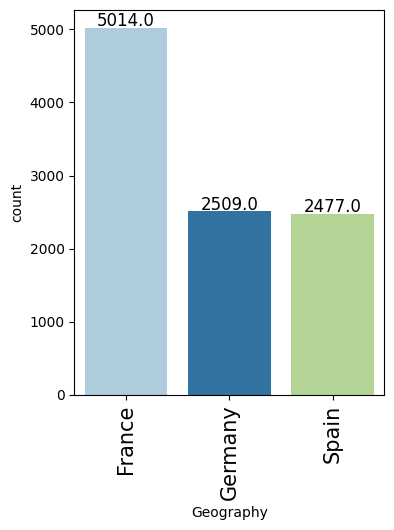

In [ ]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, "Geography")

* Observed about half the customers are located in France.
* Observed about a quarter of customers are located in Germany.
* Observed about a quarter of customers are located in Spain.

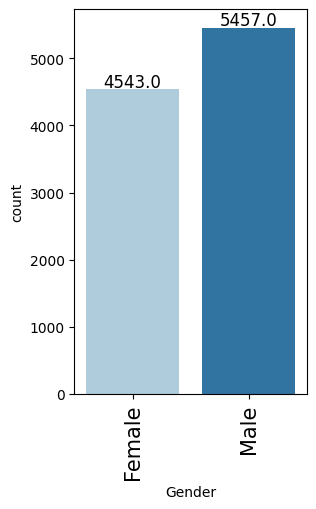

In [ ]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, 'Gender')

In [ ]:
df['Gender'].value_counts(1)

Gender
Male     0.546
Female   0.454
Name: proportion, dtype: float64

* Observed that most customers are male.
* Although males are the majority, 45% are females.

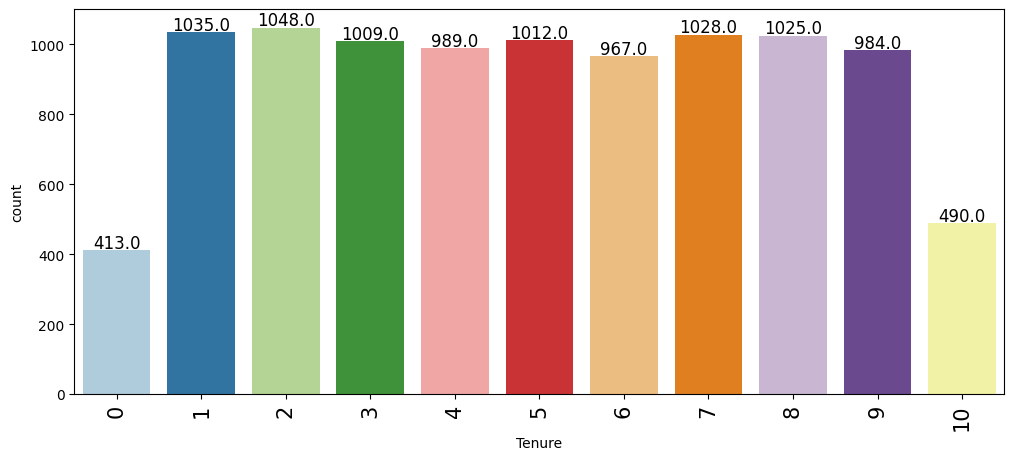

In [ ]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, "Tenure")

* Observed `tenure` ranges from 0 to 10 years.
* There are many less customers with a `tenure` of 0 or 10 years compared to other lengths of `tenure`.
* `Tenure` lengths of 1 to 9 make up the majority of `tenure` lengths.
* There are nearly equal amounts of customers with `tenure` from 1 to 9 years.

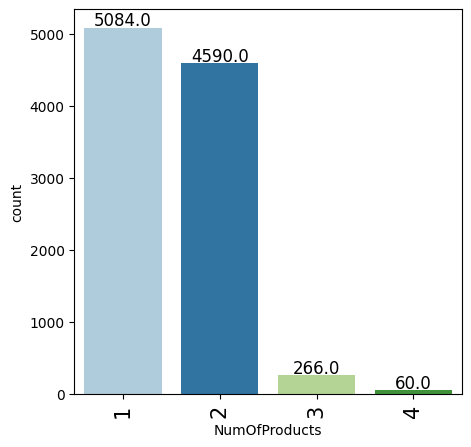

In [ ]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, "NumOfProducts")

In [ ]:
df['NumOfProducts'][df['NumOfProducts']>2].value_counts().sum()

326

* Observed the majority of customers have purchased 1 or 2 products with the bank.
* Observed only 326 customers have purchased more than 2 products with the bank.

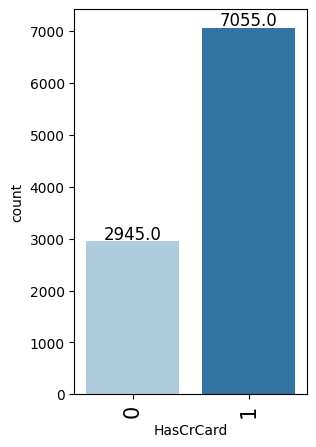

In [ ]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, 'HasCrCard')

In [ ]:
df['HasCrCard'].value_counts(1)

HasCrCard
1   0.706
0   0.294
Name: proportion, dtype: float64

* 70.6% of customers have a credit card.
* 29.4% of customers do not have a credit card.

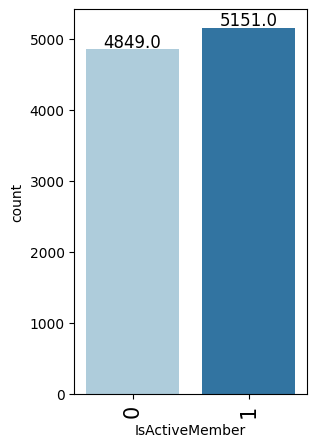

In [ ]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, 'IsActiveMember')

* Most customers are active members, but its nearly equally distributed.

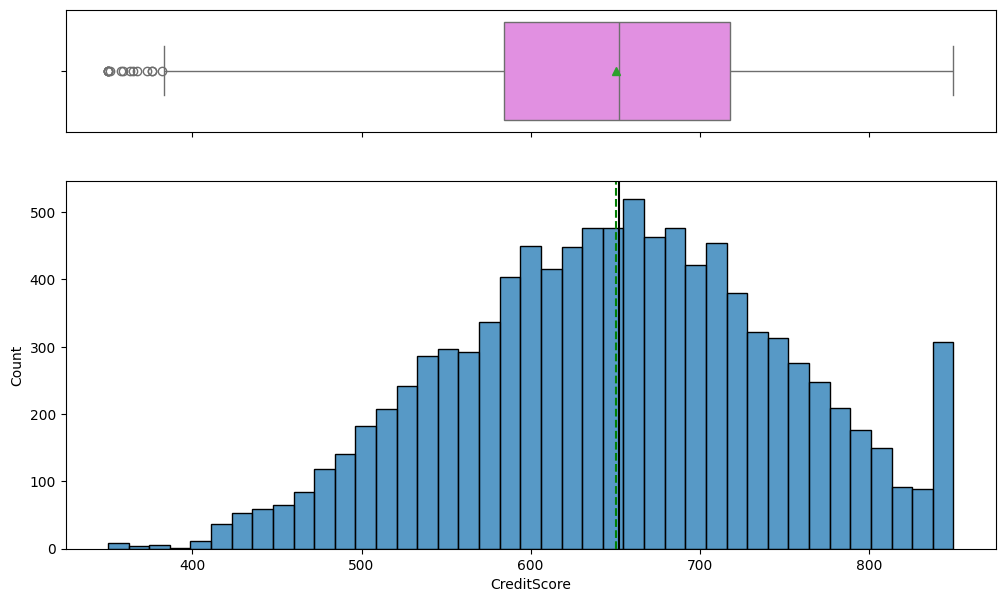

In [ ]:
# Generating a histogram with boxplot from predefined function.
histogram_boxplot(df, "CreditScore")

* Customer's `CreditScore` has a median value of about 650, with a mean very slightly lower than that.
* The data is normally distributed with a slight left skew due to outliers.

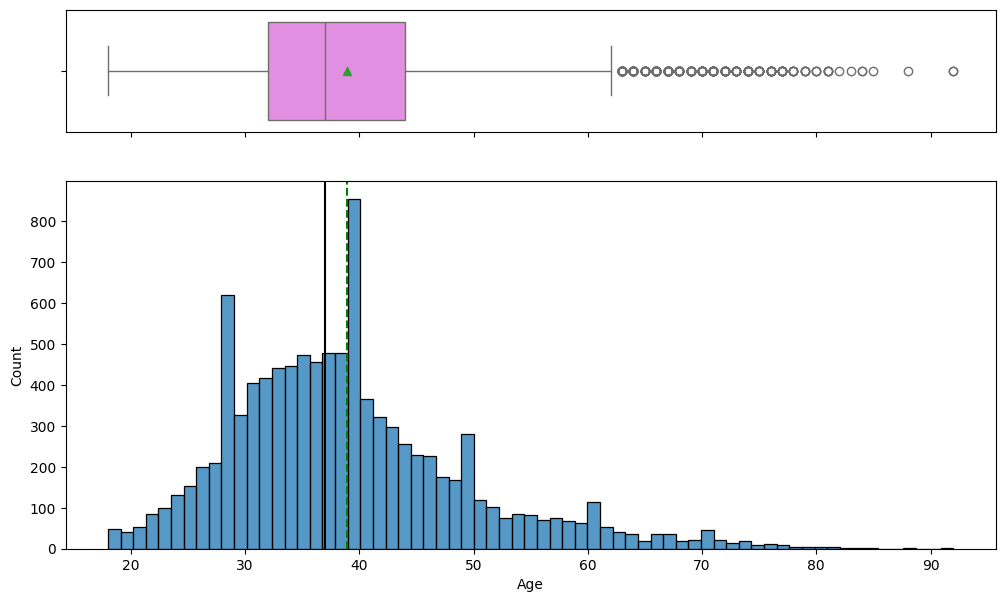

In [ ]:
# Generating a histogram with boxplot from predefined function.
histogram_boxplot(df, "Age")

In [ ]:
df['Age'].median()

37.0

In [ ]:
df['Age'].mean()

38.9218

* Observed customers have a median `age` of 37 and a mean of 38.9 years old.
* Customers over `age` 62 are appearing as outliers and are right skewing the distribution.

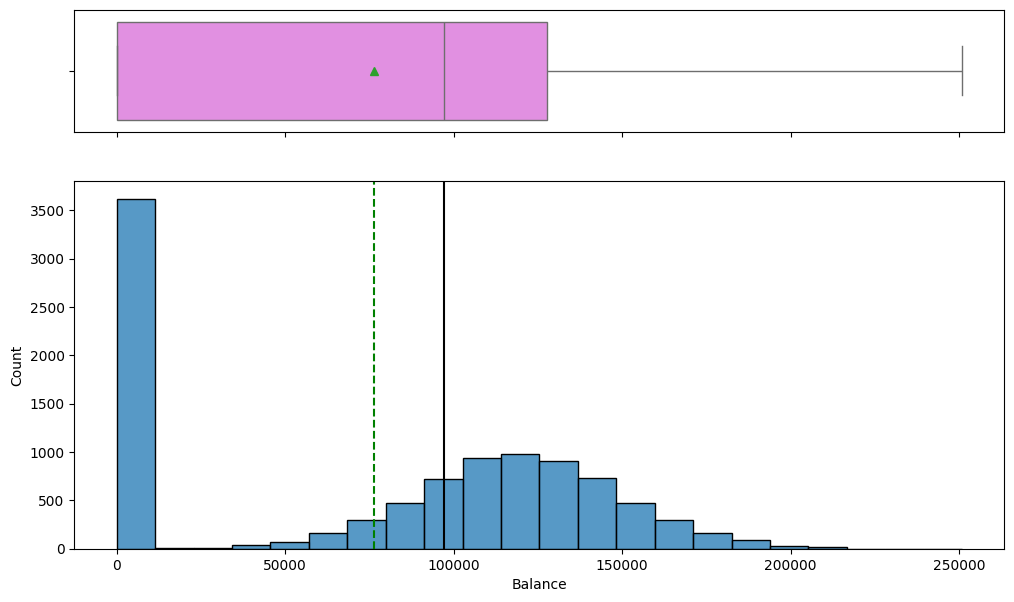

In [ ]:
# Generating a histogram with boxplot from predefined function.
histogram_boxplot(df, "Balance")

In [ ]:
df["Balance"].value_counts(1).head(5)*100

Balance
0.000        36.170
130170.820    0.020
105473.740    0.020
85304.270     0.010
159397.750    0.010
Name: proportion, dtype: float64

* Observed that 36% of customers have a `balance` of 0.
* These customers are left skewing the distribution.
* The median `balance` is almost 100k.

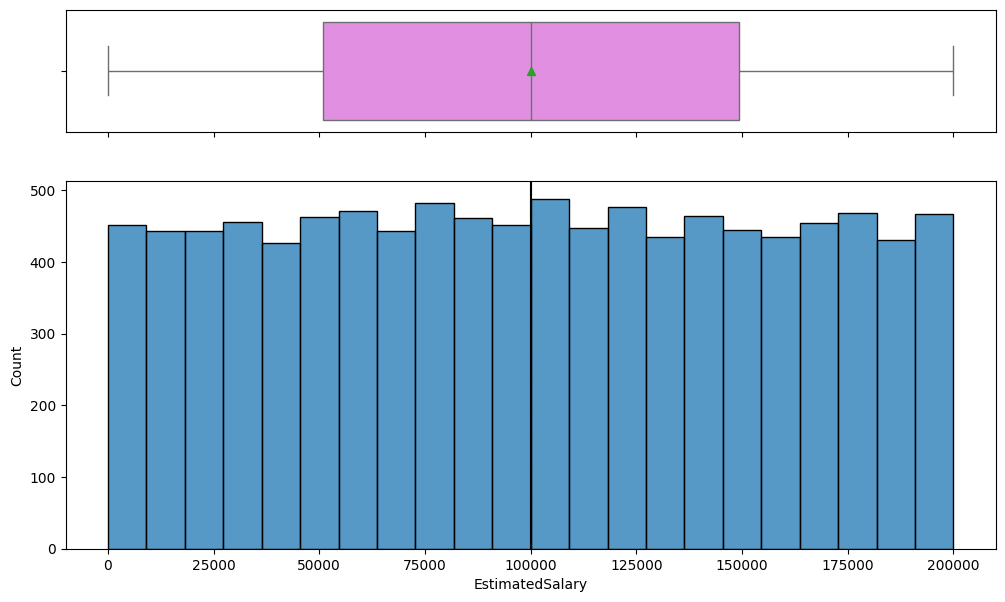

In [ ]:
# Generating a histogram with boxplot from predefined function.
histogram_boxplot(df, 'EstimatedSalary')

* Customers' `EstimatedSalary` is evenly distibuted from 0 to 200k.
* No outliers present.

### Multivariate Analysis

In [ ]:
# defining the list of numerical columns
numeric_data = df.select_dtypes(include=['int64', 'float64'])

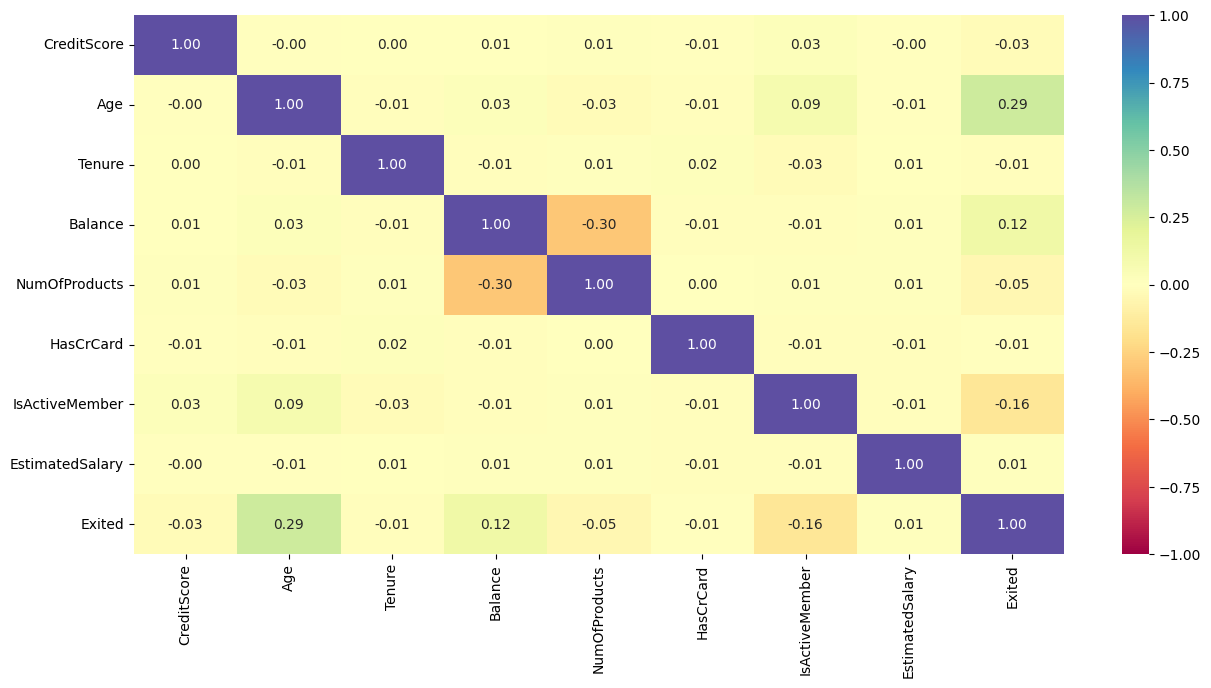

In [ ]:
# Created a correlation matrix to show any correlations between non-categorical columns.
# Values of 1 are highly positively correlated, values of -1 are highly negatively correlated.
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* No significant correlation exists between variables.
* There is some slight negative correlation between `Balance` and `NumOfProducts`.
* There is some slight positive correlation between `Age` and `Exited`.

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


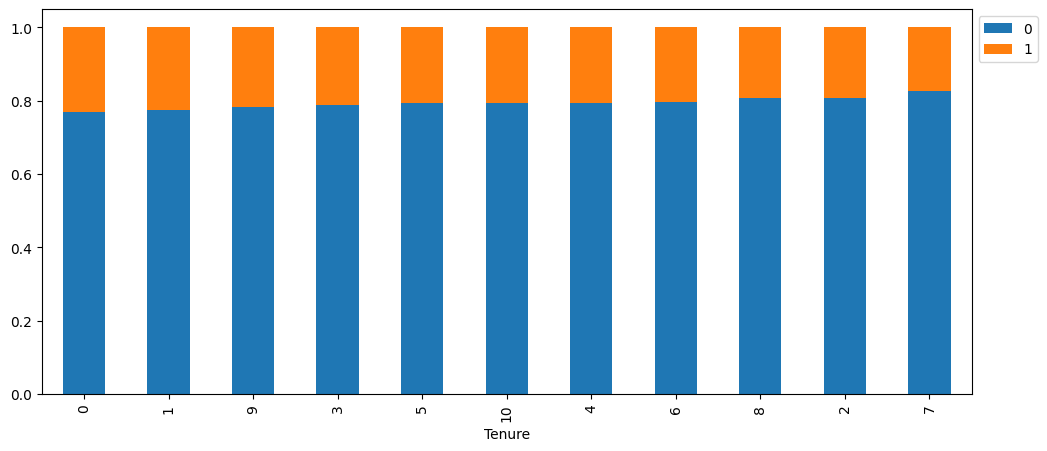

In [ ]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'Tenure', 'Exited')

* Observed class ratios are very similar between different `tenure` lengths.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


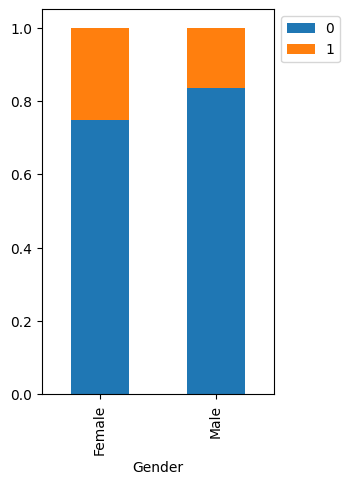

In [ ]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'Gender', 'Exited')

* Observed slightly more females have exited than men.
* Although more females have exited, the number of men who have exited is similar.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


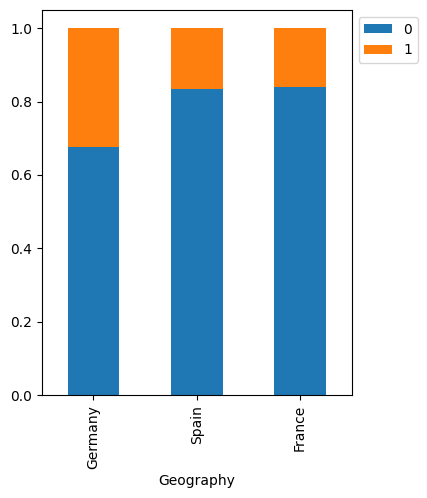

In [ ]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'Geography', 'Exited')

* Observed a larger ratio of customers located in Germany have exited than customers located in other countries.
* Customers who are located in Spain and France have a similar exit ratio.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


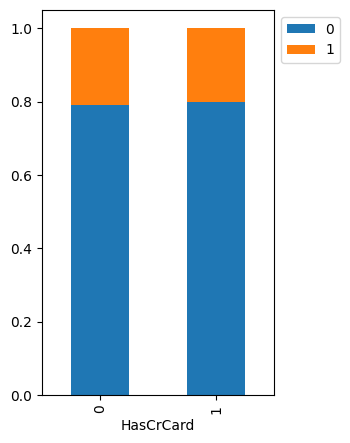

In [ ]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'HasCrCard', 'Exited')

* Observed class ratios are very similar between customers who have credit cards and those who do not have credit cards.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


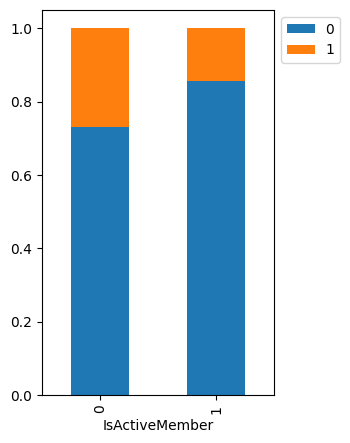

In [ ]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'IsActiveMember', 'Exited')

* Observed that customers who are not considered to be active members exit at a higher rate than customers who are considered active members.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


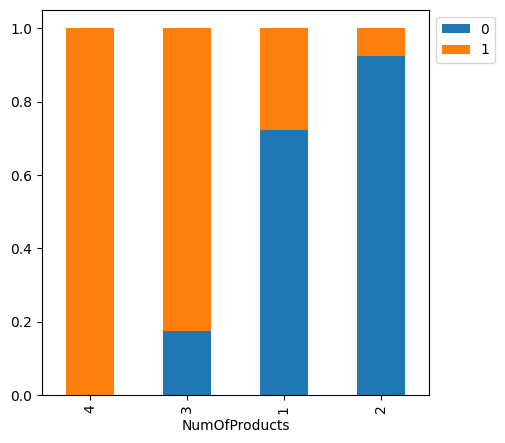

In [ ]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'NumOfProducts', 'Exited')

* All customers who purchased 4 products from the bank have exited.
* The majority of customers who purchased 3 products from the bank have exited.
* Customers who have purchased 1 or 2 products from the bank are exiting at much lower rates.
* Customers who have purchased 2 products from the bank are least likely to leave.

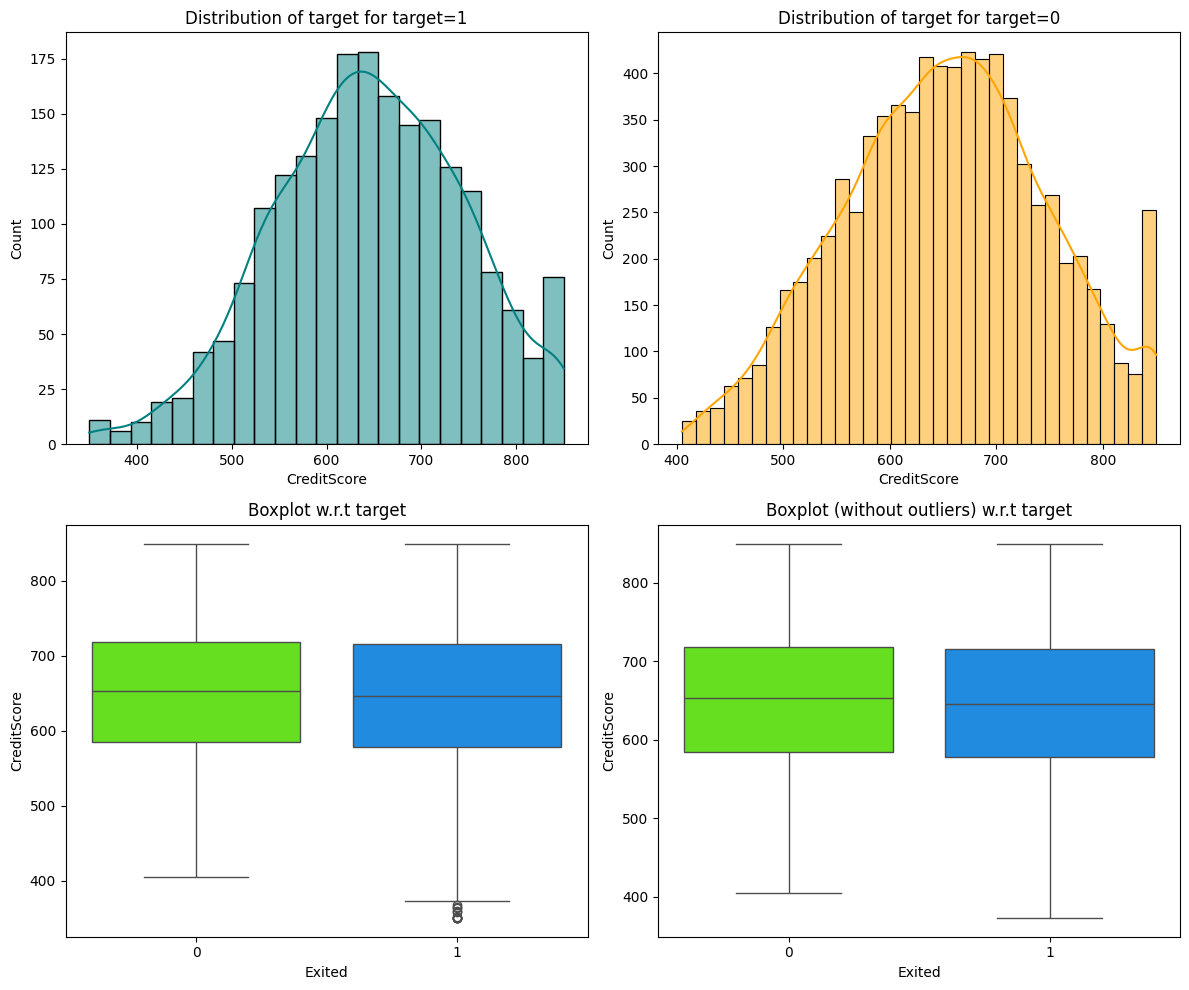

In [ ]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "CreditScore", "Exited")

* The distributions of `CreditScore` for customers who have exited and customers who have not exited are very similar.
* The box plots of `CreditScore` for customers who have exited and customers who have not exited are nearly identical.
* The minimum `CreditScore` of customers who have exited is lower than the min `CreditScore` of customers who have not exited.

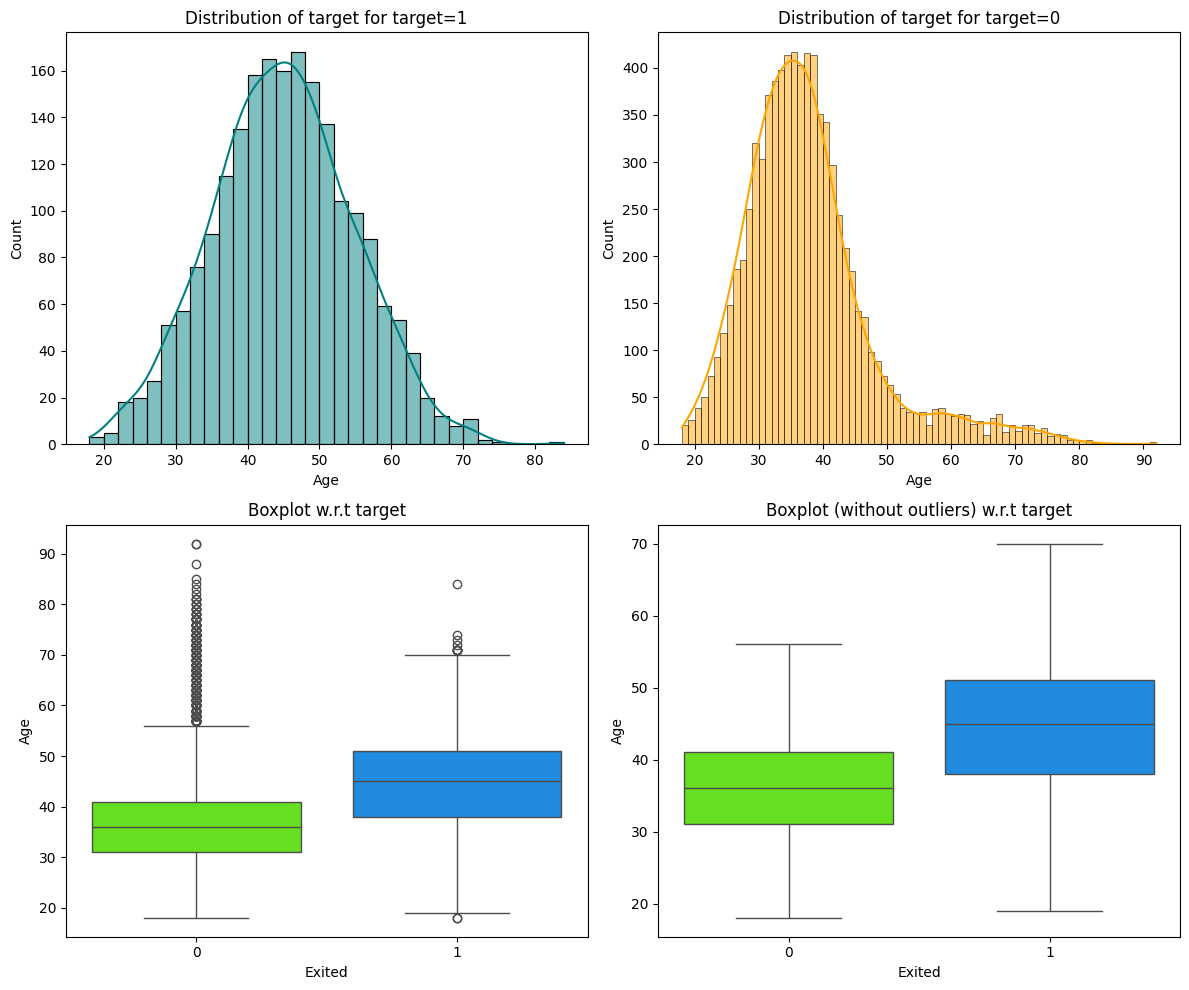

In [ ]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "Age", "Exited")

* Observed the median `age` of customers who have exited is about 45, whereas the median `age` of customers who have not exited is about 35.
* Observed the max `age` of customers who have exited is much greater than the max `age` of customers who have not exited if outliers are ignored.

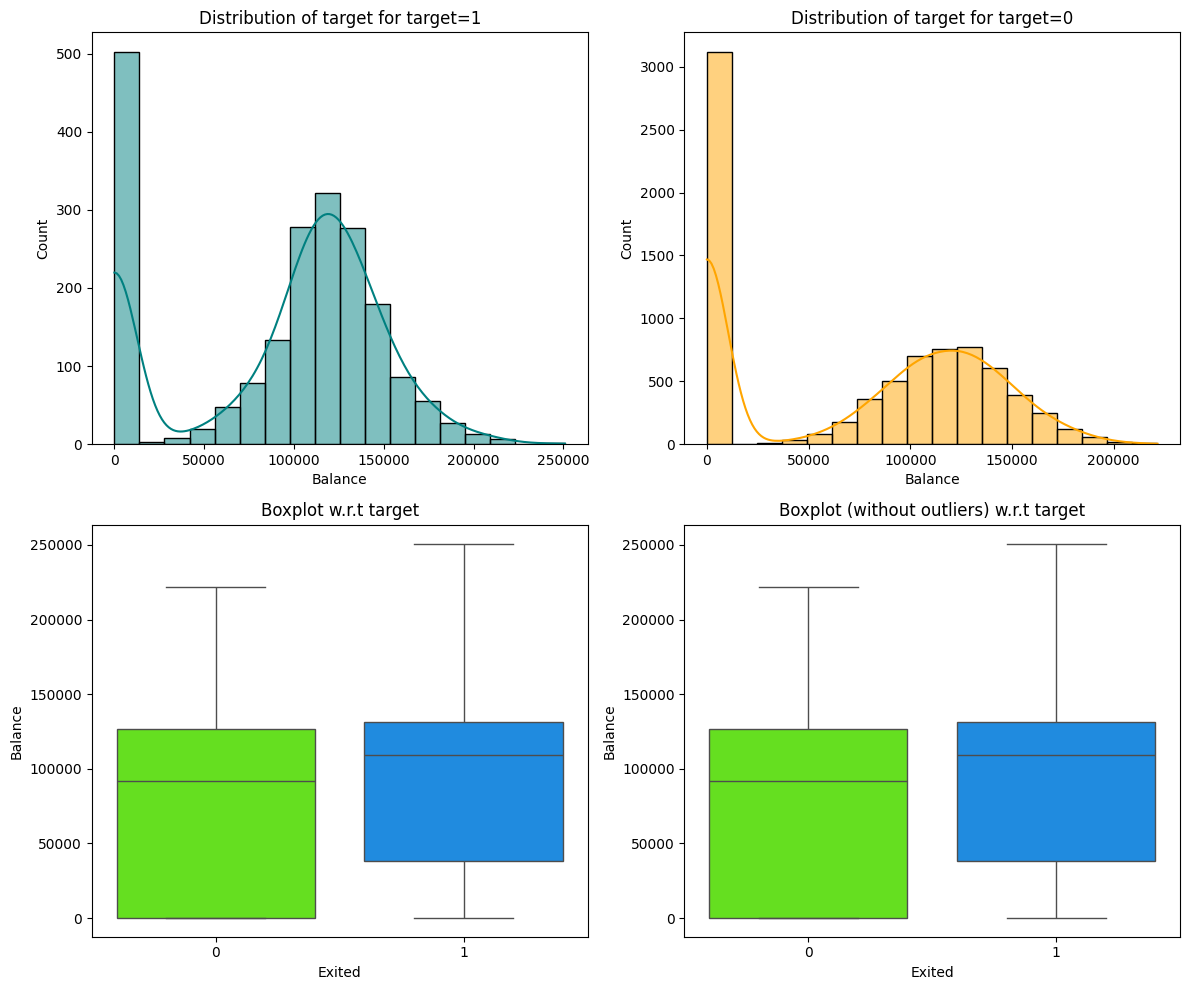

In [ ]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "Balance", "Exited")

* Observed that the distribution of account `balance` for customers who have exited and customers who have not exited is very similar.
* Observed that the peak of the distribution of account `balance` for customers who have exited is much higher than that of the same distribution for customers who have not exited.
* Observered the max account `balance` of customers who have exited is higher than the account `balance` of customers whoe have not exited.

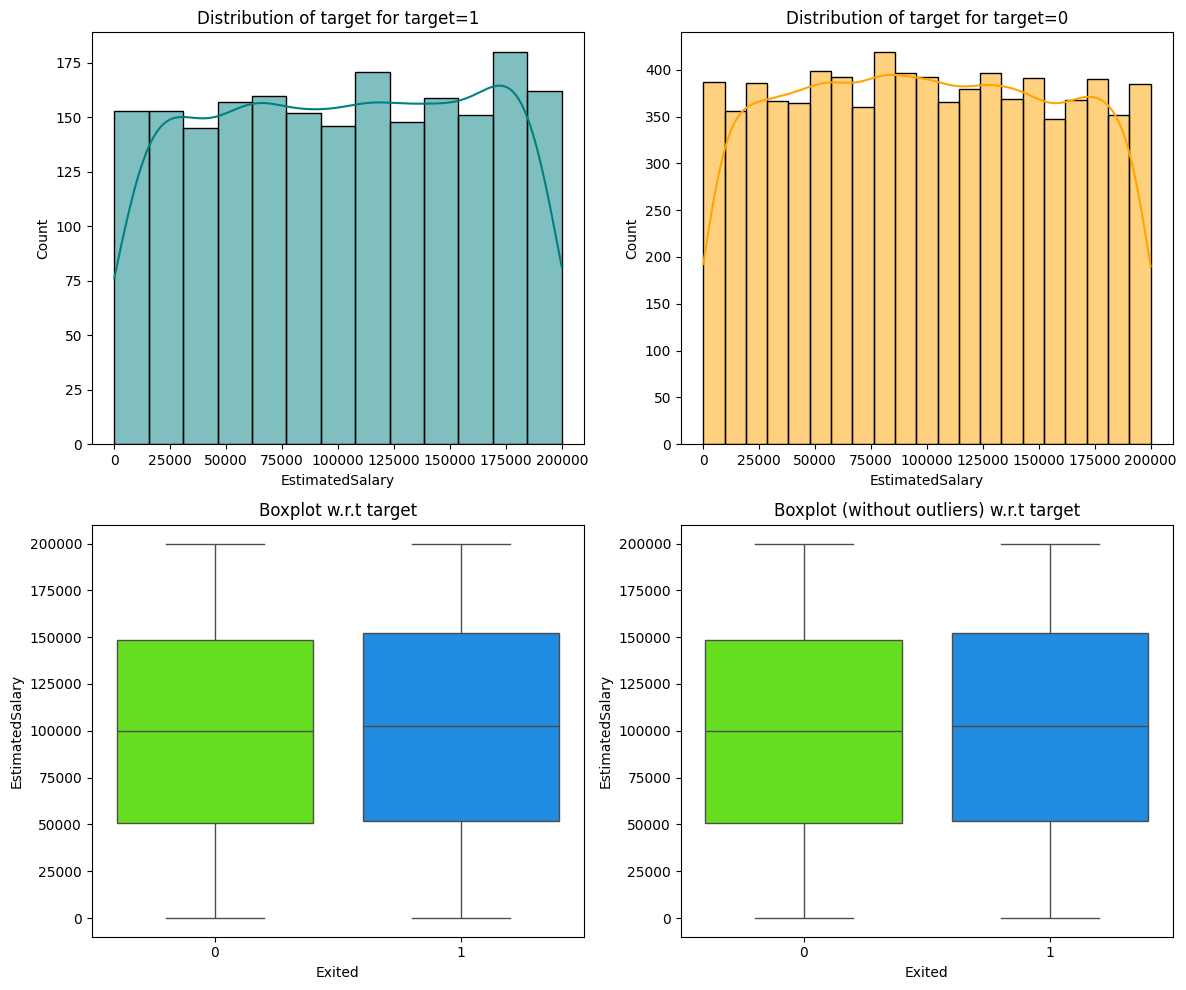

In [ ]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited")

* Observed that the distribution of `EstimatedSalary` for customers who have exited and customers who have not exited is nearly identical.
* Observed that the box plots of `EstimatedSalary` for customers who have exited and customers who have not exited is nearly identical.

## <span style="color:blue">Data Preprocessing

### Outlier Detection

In [ ]:
# Code to be used checking for outliers.
numeric_data = df.select_dtypes(include=['int64', 'float64'])
Q1 = numeric_data.quantile(0.25)  # The 25th percentile.
Q3 = numeric_data.quantile(0.75)  # The 75th percentile.

IQR = Q3 - Q1           # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding the lower bounds for all values. All values outside these bounds are outliers.
upper = Q3 + 1.5 * IQR  # Finding the upper bounds for all values. All values outside these bounds are outliers.

In [ ]:
# Checking the percentages of outliers, as defined by the previous cell.
((df.select_dtypes(include=["float64", "int64"]) < lower)
    |(df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

CreditScore        0.150
Age                3.590
Tenure             0.000
Balance            0.000
NumOfProducts      0.600
HasCrCard          0.000
IsActiveMember     0.000
EstimatedSalary    0.000
Exited            20.370
dtype: float64

* It was determined not necessary to treat any outliers.
* Although some values are outside the outlier range, these values are determined as significant for analysis.

### Train-test split

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [ ]:
# Creating the independent variable data frame.
X = df.drop(['Exited'], axis=1)
# Creating the dependent variable data frame.
y = df[['Exited']]

* Split data into independent and dependent variables.

In [ ]:
# Splitting data into training and temp data frames.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Splitting temp data frame into validation and test data frames.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
# Printing the size of the Training, Validation, and Test data frames.
print("*"*40)
print("Shape of Training Set : ", X_train.shape)
print("Shape of Validation Set", X_val.shape)
print("Shape of Test Set : ", X_test.shape)
print("*"*40)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("*"*40)

****************************************
Shape of Training Set :  (7000, 10)
Shape of Validation Set (1500, 10)
Shape of Test Set :  (1500, 10)
****************************************
Percentage of classes in training set:
Exited
0        0.796
1        0.204
Name: proportion, dtype: float64
****************************************
Percentage of classes in validation set:
Exited
0        0.796
1        0.204
Name: proportion, dtype: float64
****************************************
Percentage of classes in test set:
Exited
0        0.797
1        0.203
Name: proportion, dtype: float64
****************************************


* Split data into training, validation, and test sets.
* Models will be trained on training data, and evaluated on validation data.
* The best models will be tuned and finally evaluated on the test data.


### Encoding Categorical Variables

In [ ]:
# Encoding categorical variables for use in models.
# Dropping first of each encoded column to reduce data frame size.

# Encoding X_train data frame categorical columns.
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
# Encoding X_val data frame categorical columns.
X_val = pd.get_dummies(X_val, columns=cat_cols, drop_first=True)
# Encoding X_test data frame categorical columns.
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

* Encoded categorical columns so they can be used in the models.
* Dropped 1 dummy variable column from each category as it is unnecessary to have all columns.

In [ ]:
# Printing shape of new data frames.
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (7000, 11)
Shape of X_val: (1500, 11)
Shape of X_test: (1500, 11)


In [ ]:
# Printing shape of new data frames.
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (7000, 1)
Shape of y_val: (1500, 1)
Shape of y_test: (1500, 1)


* Observed shape of data sets.

In [ ]:
# Checking information of new data frame's columns.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 9136 to 6206
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        7000 non-null   int64  
 1   Age                7000 non-null   int64  
 2   Tenure             7000 non-null   int64  
 3   Balance            7000 non-null   float64
 4   NumOfProducts      7000 non-null   int64  
 5   HasCrCard          7000 non-null   int64  
 6   IsActiveMember     7000 non-null   int64  
 7   EstimatedSalary    7000 non-null   float64
 8   Geography_Germany  7000 non-null   bool   
 9   Geography_Spain    7000 non-null   bool   
 10  Gender_Male        7000 non-null   bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 512.7 KB


* Observed data types of training set.

In [ ]:
# Checking information of new data frame's columns.
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 6453 to 7841
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        1500 non-null   int64  
 1   Age                1500 non-null   int64  
 2   Tenure             1500 non-null   int64  
 3   Balance            1500 non-null   float64
 4   NumOfProducts      1500 non-null   int64  
 5   HasCrCard          1500 non-null   int64  
 6   IsActiveMember     1500 non-null   int64  
 7   EstimatedSalary    1500 non-null   float64
 8   Geography_Germany  1500 non-null   bool   
 9   Geography_Spain    1500 non-null   bool   
 10  Gender_Male        1500 non-null   bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 109.9 KB


* Observed data types of validation set.

In [ ]:
# Checking information of new data frame's columns.
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 9161 to 2395
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        1500 non-null   int64  
 1   Age                1500 non-null   int64  
 2   Tenure             1500 non-null   int64  
 3   Balance            1500 non-null   float64
 4   NumOfProducts      1500 non-null   int64  
 5   HasCrCard          1500 non-null   int64  
 6   IsActiveMember     1500 non-null   int64  
 7   EstimatedSalary    1500 non-null   float64
 8   Geography_Germany  1500 non-null   bool   
 9   Geography_Spain    1500 non-null   bool   
 10  Gender_Male        1500 non-null   bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 109.9 KB


* Observed data types of test set.

In [ ]:
# Checking information of new data frame's columns.
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 9136 to 6206
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exited  7000 non-null   int64
dtypes: int64(1)
memory usage: 109.4 KB


* Observed data types of training set.

In [ ]:
# Checking information of new data frame's columns.
y_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 6453 to 7841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exited  1500 non-null   int64
dtypes: int64(1)
memory usage: 23.4 KB


* Observed data types of validation set.

In [ ]:
# Checking information of new data frame's columns.
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 9161 to 2395
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exited  1500 non-null   int64
dtypes: int64(1)
memory usage: 23.4 KB


* Observed data types of test set.

### Normalizing numerical data

In [ ]:
# Scaling numerical data of independent variables using StandardScaler()
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])

* Normalized numerical data to reduce bias of larger numbers.

In [ ]:
# Changing the datatype for tensorflow
X_train = np.asarray(X_train).astype(np.float32)
X_val = np.asarray(X_val).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

y_train = np.asarray(y_train).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

## <span style="color:blue">Model Building

### Model Evaluation Criterion

**The model can predict customer behavior in four outcomes**

* Inaccurately predicting that a customer will leave (exit) when they do not (FP).
*Inaccurately predicting that a customer will stay when they actually leave (FN).
*Accurately predicting that a customer will stay (TN).
*Accurately predicting that a customer will leave (exit) (TP).

**Which metric to optimize?**

* The scenario of inaccurately predicting that a customer will stay is often considered the most critical, as it involves losing a valuable customer. To mitigate this, it is essential to minimize false negatives and maximize recall.

* Banks typically aim to maximize recall in their predictive models to enhance the likelihood of identifying true positives, thereby effectively recognizing customers at risk of leaving. This allows banks to proactively address their concerns and retain valuable customers.

In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
## Let's create two blank dataframes that will store the recall values for all the models we build.
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Model Building: Neural Network with SGD Optimizer

In [ ]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [ ]:
# Creating a sequential model.
model0 = Sequential()
# Adding the hidden and output layers.
model0.add(Dense(activation="relu", input_dim=X_train.shape[1], units=64))
model0.add(Dense(32, activation="relu"))
model0.add(Dense(1, activation= 'sigmoid'))

In [ ]:
# Compiling the model with SGD optimizer and binary cross entropy loss function.
model0.compile(optimizer='SGD', loss='binary_crossentropy', metrics=[keras.metrics.Recall()])

In [ ]:
# Checking the summary of the model.
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the model to training data and storing the results.
history = model0.fit(X_train,
                  y_train,
                  validation_data=(X_val, y_val),
                  epochs=50,
                  batch_size=64,
                  verbose=1)
print("*" * 130)
print("Model has been fit to training data.")

Epoch 1/50
110/110 [==============================] - 5s 22ms/step - loss: 0.5640 - recall: 0.0813 - val_loss: 0.5043 - val_recall: 0.0000e+00
Epoch 2/50
110/110 [==============================] - 1s 9ms/step - loss: 0.4875 - recall: 0.0000e+00 - val_loss: 0.4774 - val_recall: 0.0000e+00
Epoch 3/50
110/110 [==============================] - 1s 7ms/step - loss: 0.4717 - recall: 0.0000e+00 - val_loss: 0.4638 - val_recall: 0.0000e+00
Epoch 4/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4619 - recall: 7.0126e-04 - val_loss: 0.4536 - val_recall: 0.0033
Epoch 5/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4541 - recall: 0.0028 - val_loss: 0.4450 - val_recall: 0.0033
Epoch 6/50
110/110 [==============================] - 1s 6ms/step - loss: 0.4474 - recall: 0.0056 - val_loss: 0.4378 - val_recall: 0.0163
Epoch 7/50
110/110 [==============================] - 1s 6ms/step - loss: 0.4417 - recall: 0.0175 - val_loss: 0.4318 - val_recall: 0.0163
Epoch 8/5

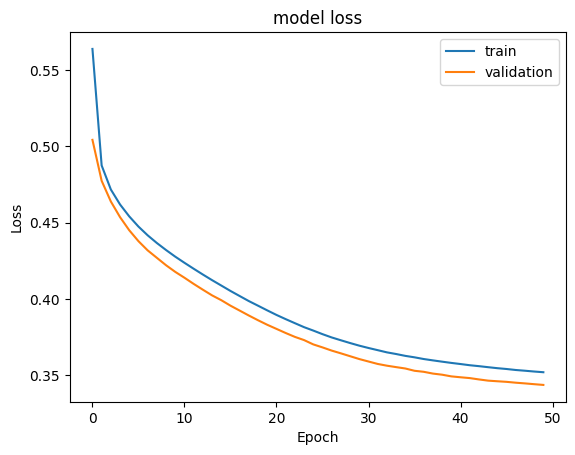

In [ ]:
# Plotting Train Loss vs Validation Loss.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

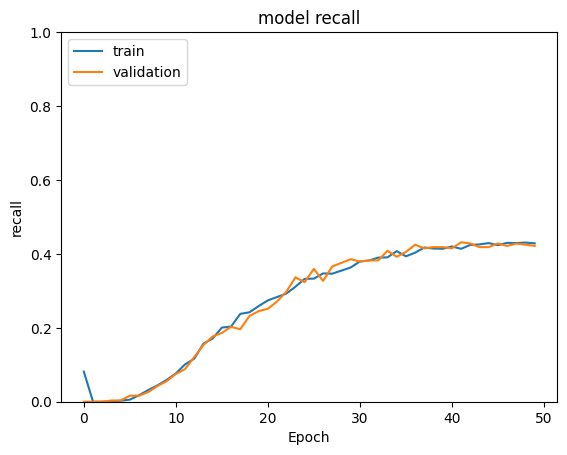

In [ ]:
# Plotting Train Recall vs Validation Recall.
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0, 1)
plt.show()

In [ ]:
# Predicting y using default threshold.
y_train_pred = model0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

219/219 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
# Predicting y using default threshold.
y_val_pred = model0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

47/47 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
# Saving model recall scores
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [ ]:
# Model classification report.
cr = sklearn.metrics.classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      5574
         1.0       0.76      0.43      0.55      1426

    accuracy                           0.86      7000
   macro avg       0.81      0.70      0.73      7000
weighted avg       0.85      0.86      0.84      7000



In [ ]:
# Accuracy as per the classification report.
cr = sklearn.metrics.classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1194
         1.0       0.72      0.42      0.53       306

    accuracy                           0.85      1500
   macro avg       0.79      0.69      0.72      1500
weighted avg       0.84      0.85      0.83      1500



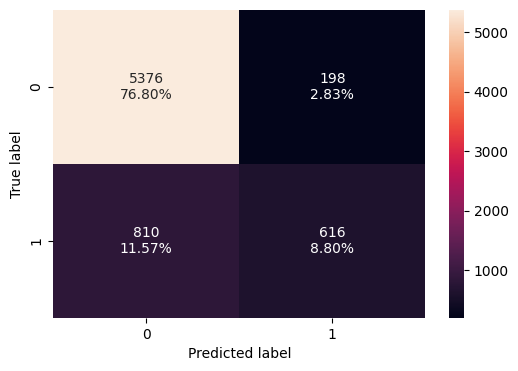

In [ ]:
# Calculating the confusion matrix.
make_confusion_matrix(y_train, y_train_pred)

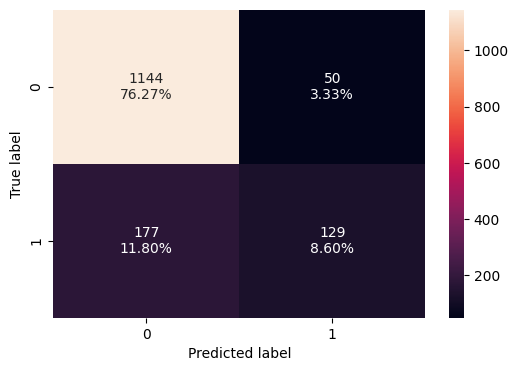

In [ ]:
# Calculating the confusion matrix.
make_confusion_matrix(y_val, y_val_pred)

* This model using SGD is not very good.
* The recall is only 0.42.
* Approximately 11.8% of customers are leaving without the bank making any attempt to intervene.

### Model Improvement: Neural Network model with Adam Optimizer

In [ ]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [ ]:
# Creating a sequential model.
model1 = Sequential()
# Adding the hidden and output layers.
model1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Compiling with Adam optimizer and binary cross entropy loss function.
optimizer1 = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer1,metrics=[keras.metrics.Recall()])

In [ ]:
# Checking the summary of the model.
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the model to training data and storing the results.
history1 = model1.fit(X_train,
                      y_train,
                      batch_size=48,
                      epochs=20,
                      verbose=1,
                      validation_data=(X_val, y_val))
print("*" * 130)
print("Model has been fit to training data.")

Epoch 1/20
146/146 [==============================] - 1s 4ms/step - loss: 0.4642 - recall: 0.0701 - val_loss: 0.4048 - val_recall: 0.1895
Epoch 2/20
146/146 [==============================] - 0s 3ms/step - loss: 0.3968 - recall: 0.2966 - val_loss: 0.3674 - val_recall: 0.3660
Epoch 3/20
146/146 [==============================] - 0s 2ms/step - loss: 0.3684 - recall: 0.4046 - val_loss: 0.3520 - val_recall: 0.4379
Epoch 4/20
146/146 [==============================] - 0s 3ms/step - loss: 0.3567 - recall: 0.4292 - val_loss: 0.3532 - val_recall: 0.5817
Epoch 5/20
146/146 [==============================] - 0s 3ms/step - loss: 0.3514 - recall: 0.4467 - val_loss: 0.3358 - val_recall: 0.4477
Epoch 6/20
146/146 [==============================] - 0s 3ms/step - loss: 0.3468 - recall: 0.4544 - val_loss: 0.3392 - val_recall: 0.4771
Epoch 7/20
146/146 [==============================] - 0s 2ms/step - loss: 0.3431 - recall: 0.4593 - val_loss: 0.3369 - val_recall: 0.4902
Epoch 8/20
146/146 [==============

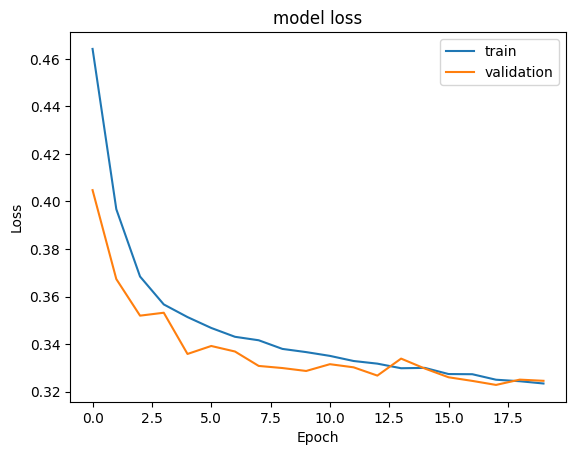

In [ ]:
# Plotting Train Loss vs Validation Loss.
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

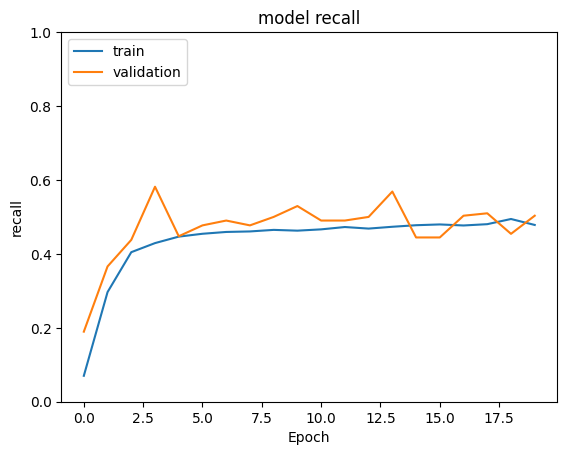

In [ ]:
# Plotting Train recall vs Validation recall.
plt.plot(history1.history['recall'])
plt.plot(history1.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0, 1)
plt.show()

219/219 [==============================] - 1s 2ms/step
Best Threshold=0.186029, G-Mean=0.800


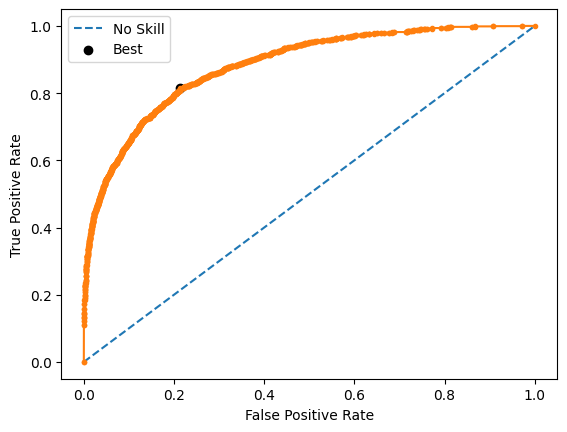

In [ ]:
# Calculate Best Threshold.
yhat1 = model1.predict(X_train)
# Keeping probabilities for the positive outcomes only.
yhat1 = yhat1[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds1 = roc_curve(y_train, yhat1)
# Calculating the g-mean for each threshold.
gmeans1 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [ ]:
# Predicting the results using best as a threshold.
y_train_pred1 = model1.predict(X_train)
y_train_pred1 = (y_train_pred1 > thresholds1[ix])
y_train_pred1

219/219 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
# Predicting the results using best as a threshold.
y_val_pred1 = model1.predict(X_val)
y_val_pred1 = (y_val_pred1 > thresholds1[ix])
y_val_pred1

47/47 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
model_name = "NN with Adam Optimizer"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred1)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred1)

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred1)
print(cr)

              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86      5574
         1.0       0.49      0.81      0.61      1426

    accuracy                           0.79      7000
   macro avg       0.72      0.80      0.74      7000
weighted avg       0.85      0.79      0.81      7000



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred1)
print(cr)

              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85      1194
         1.0       0.48      0.81      0.60       306

    accuracy                           0.78      1500
   macro avg       0.71      0.79      0.72      1500
weighted avg       0.85      0.78      0.80      1500



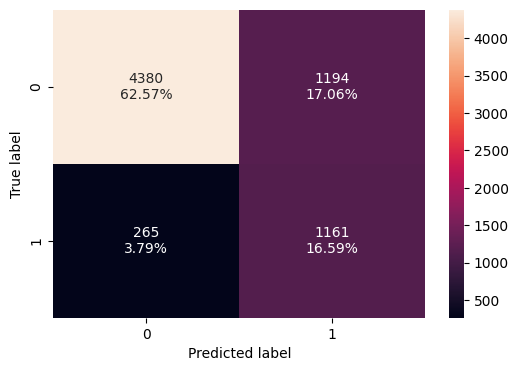

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred1)

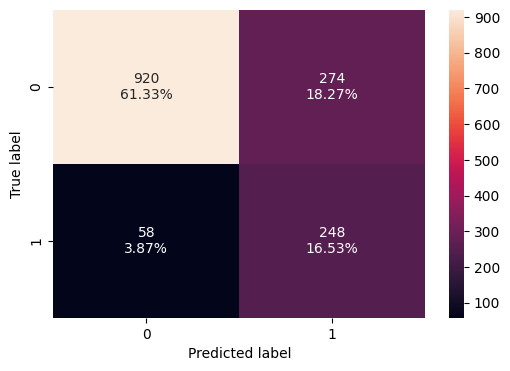

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred1)

* Recall score: 0.81
* Results in 3.8% of customers exiting without the bank attempting to intervene.

### Model Improvement: Neural Network with Adam Optimizer and Dropout

In [ ]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [ ]:
# Creating a sequential model.
model2 = Sequential()
# Adding the hidden and output layers with drop out.
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(Dropout(0.2))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Checking the summary of the model.
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-traina

In [ ]:
# Compiling with Adam optimizer and binary cross entropy loss function.
optimizer2 = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer2,metrics=[keras.metrics.Recall()])

In [ ]:
# Fitting the model to training data and storing the results.
history2 = model2.fit(X_train,
                      y_train,
                      batch_size=64,
                      epochs=20,
                      verbose=1,
                      validation_data=(X_val, y_val))
print("*" * 130)
print("Model has been fit to training data.")

Epoch 1/20
110/110 [==============================] - 2s 5ms/step - loss: 0.4668 - recall: 0.0701 - val_loss: 0.3969 - val_recall: 0.1895
Epoch 2/20
110/110 [==============================] - 0s 3ms/step - loss: 0.4042 - recall: 0.2805 - val_loss: 0.3593 - val_recall: 0.3758
Epoch 3/20
110/110 [==============================] - 0s 3ms/step - loss: 0.3748 - recall: 0.3913 - val_loss: 0.3444 - val_recall: 0.4902
Epoch 4/20
110/110 [==============================] - 0s 3ms/step - loss: 0.3641 - recall: 0.4250 - val_loss: 0.3440 - val_recall: 0.5719
Epoch 5/20
110/110 [==============================] - 0s 3ms/step - loss: 0.3618 - recall: 0.4285 - val_loss: 0.3322 - val_recall: 0.4771
Epoch 6/20
110/110 [==============================] - 0s 3ms/step - loss: 0.3561 - recall: 0.4313 - val_loss: 0.3334 - val_recall: 0.4967
Epoch 7/20
110/110 [==============================] - 0s 3ms/step - loss: 0.3542 - recall: 0.4355 - val_loss: 0.3308 - val_recall: 0.4902
Epoch 8/20
110/110 [==============

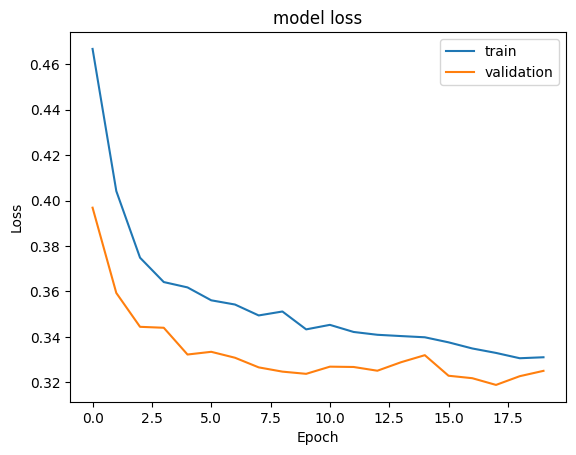

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


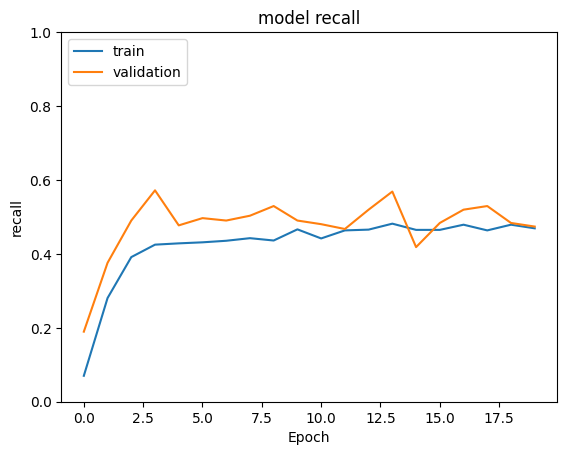

In [ ]:
# Plotting Train recall vs Validation recall.
plt.plot(history2.history['recall'])
plt.plot(history2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0, 1)
plt.show()

219/219 [==============================] - 0s 1ms/step
Best Threshold=0.188080, G-Mean=0.805


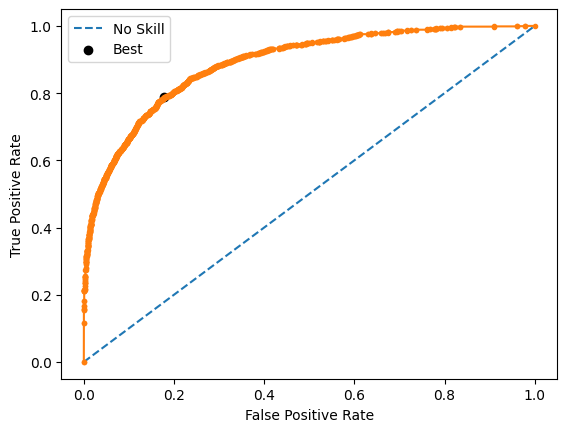

In [ ]:
# Predicting probabilities.
yhat2 = model2.predict(X_train)
# Keeping probabilities for the positive outcomes only.
yhat2 = yhat2[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds2 = roc_curve(y_train, yhat2)
# Calculating the g-mean for each threshold.
gmeans2 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [ ]:
# Predicting the results using best as a threshold.
y_train_pred2 = model1.predict(X_train)
y_train_pred2 = (y_train_pred2 > thresholds2[ix])
y_train_pred2

219/219 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
# Predicting the results using best as a threshold.
y_val_pred2 = model2.predict(X_val)
y_val_pred2 = (y_val_pred2 > thresholds2[ix])
y_val_pred2

47/47 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
model_name = "NN with Adam Optimizer and Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred2)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred2)

In [ ]:
#lassification report
cr=classification_report(y_train,y_train_pred2)
print(cr)

              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86      5574
         1.0       0.49      0.81      0.61      1426

    accuracy                           0.79      7000
   macro avg       0.72      0.80      0.73      7000
weighted avg       0.85      0.79      0.81      7000



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred2)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86      1194
         1.0       0.50      0.76      0.61       306

    accuracy                           0.80      1500
   macro avg       0.72      0.79      0.74      1500
weighted avg       0.84      0.80      0.81      1500



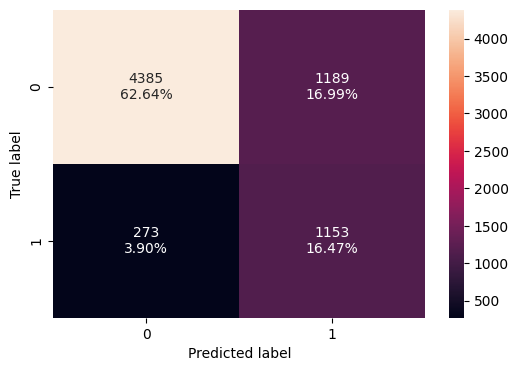

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred2)

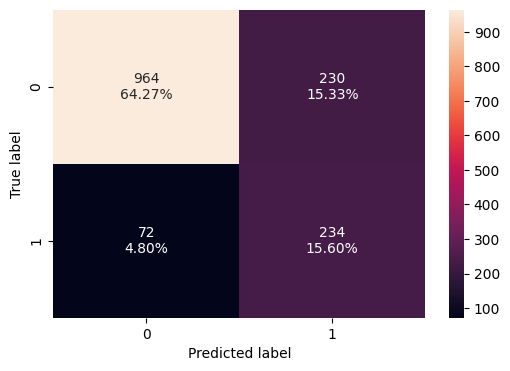

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred2)

* With the recall of 0.76, this model performs less effectively than the previous one.

In [ ]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [ ]:
# Defining function to create and compile ANN.
def create_model(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32,batch_size=40):
    np.random.seed(1337)
    #Initializing the neural network
    model3 = Sequential()
    # This adds the input layer (by specifying input dimension).
    model3.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))
    # Adding dropout.
    model3.add(Dropout(0.5))
    # Adding the hidden layer.
    model3.add(Dense(layer_2,activation='relu'))
    # Adding the output layer.
    model3.add(Dense(1, activation='sigmoid'))
    # Adding Adam initializer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # Compiling with Adam optimizer and binary cross entropy loss function.
    model3.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = [keras.metrics.Recall()])
    return model3

In [ ]:
# Creating estimator using KerasClassifier with inital lr of 0.001 and build_fn create_model.
keras_estimator = KerasClassifier(lr= 0.001, build_fn=create_model, verbose=1)

In [ ]:
# Defining the grid search parameters.
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}
# Using 3 folds for validation.
kfold_splits = 3
# Using GridSearchCV to find best parameters for ANN.
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,
                    n_jobs=-1)

### Model Improvement: Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
# Applying SMOTE on training data to oversample data.
sm = SMOTE(sampling_strategy='not majority')
X_train_sm , y_train_sm = sm.fit_resample(X_train,y_train)
print('Before resampling, the shape of X_train: {}'.format(X_train.shape))
print('Before resampling, the shape of y_train: {} \n'.format(y_train.shape))
print('After resampling, the shape of X_train: {}'.format(X_train_sm.shape))
print('After resampling, the shape of y_train: {} \n'.format(y_train_sm.shape))

Before resampling, the shape of X_train: (7000, 11)
Before resampling, the shape of y_train: (7000, 1) 

After resampling, the shape of X_train: (11148, 11)
After resampling, the shape of y_train: (11148,) 



In [ ]:
# Checking value counts of y_train before oversampling.
unique_values, counts = np.unique(y_train, return_counts=True)
value_counts = dict(zip(unique_values, counts))
value_counts

{0.0: 5574, 1.0: 1426}

In [ ]:
# Checking value counts of y_train_sm after oversampling.
unique_values, counts = np.unique(y_train_sm, return_counts=True)
value_counts = dict(zip(unique_values, counts))
value_counts

{0.0: 5574, 1.0: 5574}

In [ ]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [ ]:
# Creating a sequential model.
model4 = Sequential()
# Adding the input layer with 32 neurons and relu as the activation function.
model4.add(Dense(32,activation='relu',input_dim = X_train_sm.shape[1]))
# Adding the dropout.
model4.add(Dropout(0.2))
# Adding hidden layer with 16 neurons.
model4.add(Dense(16,activation='relu'))
# Adding the dropout.
model4.add(Dropout(0.1))
# Adding hidden layer with 8 neurons.
model4.add(Dense(8, activation='relu'))
# Adding the output layer.
model4.add(Dense(1, activation = 'relu'))

In [ ]:
# Printing model summary.
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [ ]:
# Defining EarlyStopping as the callback for this model.
es_cb = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer.
optimizer4 = tf.keras.optimizers.SGD(0.001)

# Compiling the model with binary cross entropy as loss and accuracy as metrics.
model4.compile(optimizer=optimizer4,loss = 'binary_crossentropy', metrics = [keras.metrics.Recall()])

# Fitting the model to training data and storing the results.
history4 = model4.fit(X_train_sm,
                      y_train_sm,
                      batch_size=64,
                      epochs=50,
                      verbose=1,
                      validation_data = (X_val,y_val),
                      callbacks=[es_cb])

Epoch 1/50
175/175 [==============================] - 2s 5ms/step - loss: 1.2114 - recall: 0.3970 - val_loss: 0.5587 - val_recall: 0.1863
Epoch 2/50
175/175 [==============================] - 1s 3ms/step - loss: 0.7952 - recall: 0.3954 - val_loss: 0.5393 - val_recall: 0.2582
Epoch 3/50
175/175 [==============================] - 1s 3ms/step - loss: 0.7513 - recall: 0.4385 - val_loss: 0.5380 - val_recall: 0.3301
Epoch 4/50
175/175 [==============================] - 1s 4ms/step - loss: 0.7245 - recall: 0.3662 - val_loss: 0.5296 - val_recall: 0.2941
Epoch 5/50
175/175 [==============================] - 1s 4ms/step - loss: 0.7043 - recall: 0.3550 - val_loss: 0.5424 - val_recall: 0.3301
Epoch 6/50
175/175 [==============================] - 1s 4ms/step - loss: 0.7018 - recall: 0.3811 - val_loss: 0.5283 - val_recall: 0.1601
Epoch 7/50
175/175 [==============================] - 1s 4ms/step - loss: 0.6718 - recall: 0.4589 - val_loss: 0.5530 - val_recall: 0.3987
Epoch 8/50
175/175 [==============

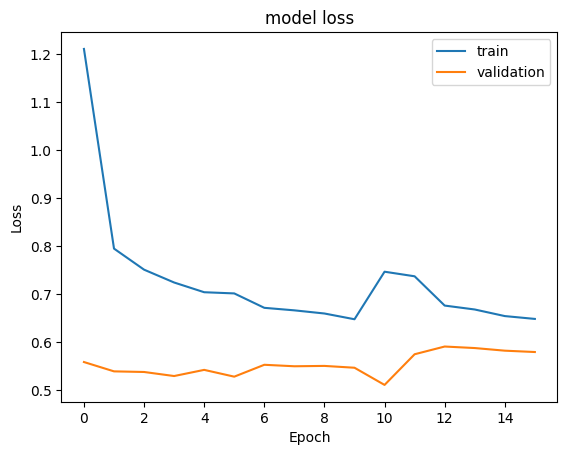

In [ ]:
# Plotting Train Loss vs Validation Loss.
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

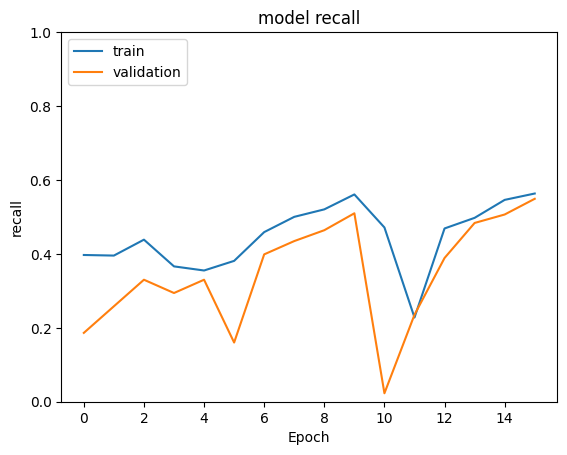

In [ ]:
# Plotting Train recall vs Validation recall.
plt.plot(history4.history['recall'])
plt.plot(history4.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0, 1)
plt.show()

349/349 [==============================] - 1s 1ms/step
Best Threshold=0.463798, G-Mean=0.695


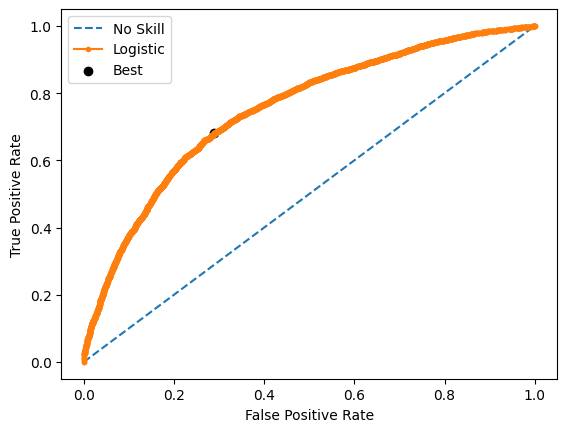

In [ ]:
# Predicting probabilities.
yhat4 = model4.predict(X_train_sm)
# Keeping probabilities for the positive outcome only.
yhat4 = yhat4[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds4 = roc_curve(y_train_sm, yhat4)
# Calculating the g-mean for each threshold.
gmeans4 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [ ]:
# Predicting the results using best as a threshold.
y_train_pred4 = model4.predict(X_train_sm)
y_train_pred4 = (y_train_pred4 > thresholds4[ix])
y_train_pred4

349/349 [==============================] - 1s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
# Predicting the results using best as a threshold.
y_val_pred4 = model4.predict(X_val)
y_val_pred4 = (y_val_pred4 > thresholds4[ix])
y_val_pred4

47/47 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
model_name = "NN with Balanced Data (by applying SMOTE) and SGD Optimizer"

train_metric_df.loc[model_name] = recall_score(y_train_sm,y_train_pred4)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred4)

In [ ]:
#classification report
cr=classification_report(y_train_sm,y_train_pred4)
print(cr)

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70      5574
         1.0       0.70      0.68      0.69      5574

    accuracy                           0.70     11148
   macro avg       0.70      0.70      0.70     11148
weighted avg       0.70      0.70      0.70     11148



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred4)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1194
         1.0       0.40      0.71      0.51       306

    accuracy                           0.73      1500
   macro avg       0.65      0.72      0.66      1500
weighted avg       0.80      0.73      0.75      1500



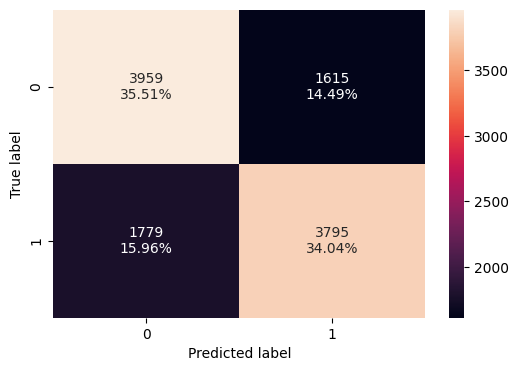

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_sm, y_train_pred4)

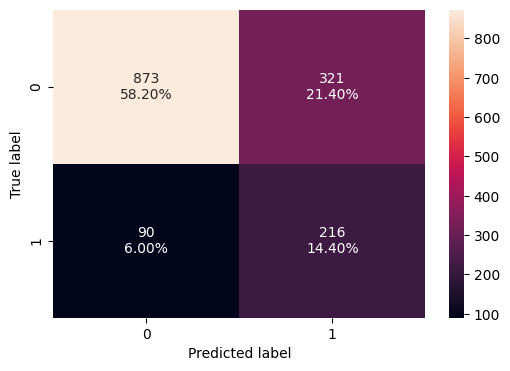

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred4)

* With a recall of 0.71, this model is less effective than Model 1.

### Model Improvement: Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
# Applying SMOTE on training data to oversample data.
sm = SMOTE(sampling_strategy='not majority')
X_train_sm , y_train_sm = sm.fit_resample(X_train,y_train)
print('After resampling, the shape of X_train: {}'.format(X_train.shape))
print('After resampling, the shape of y_train: {} \n'.format(y_train.shape))

After resampling, the shape of X_train: (7000, 11)
After resampling, the shape of y_train: (7000, 1) 



In [ ]:
# Checking value counts of y_train before oversampling.
unique_values, counts = np.unique(y_train, return_counts=True)
value_counts = dict(zip(unique_values, counts))
value_counts

{0.0: 5574, 1.0: 1426}

In [ ]:
# Checking value counts of y_train_sm after oversampling.
unique_values, counts = np.unique(y_train_sm, return_counts=True)
value_counts = dict(zip(unique_values, counts))
value_counts

{0.0: 5574, 1.0: 5574}

In [ ]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [ ]:
# Creating a sequential model.
model5 = Sequential()
# Adding the input layer with 32 neurons and relu as the activation function.
model5.add(Dense(32,activation='relu',input_dim = X_train_sm.shape[1]))
# Adding hidden layer with 16 neurons.
model5.add(Dense(16,activation='relu'))
# Adding hidden layer with 8 neurons.
model5.add(Dense(8, activation='relu'))
# Adding the output layer.
model5.add(Dense(1, activation = 'relu'))

In [ ]:
# Printing model summary.
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining EarlyStopping as the callback for this model.
es_cb = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer.
optimizer5 = tf.keras.optimizers.Adam(0.001)

# Compiling the model with binary cross entropy as loss and accuracy as metrics.
model5.compile(optimizer=optimizer5,loss = 'binary_crossentropy', metrics = [keras.metrics.Recall()])

# Fitting the model to training data and storing the results.
history5 = model5.fit(X_train_sm,
                      y_train_sm,
                      batch_size=64,
                      epochs=50,
                      verbose=1,
                      validation_data = (X_val,y_val),
                      callbacks=[es_cb])

Epoch 1/50
175/175 [==============================] - 2s 4ms/step - loss: 0.8260 - recall: 0.5639 - val_loss: 0.5139 - val_recall: 0.6046
Epoch 2/50
175/175 [==============================] - 0s 2ms/step - loss: 0.5750 - recall: 0.7033 - val_loss: 0.5726 - val_recall: 0.7549
Epoch 3/50
175/175 [==============================] - 0s 3ms/step - loss: 0.5448 - recall: 0.6471 - val_loss: 0.5014 - val_recall: 0.7059
Epoch 4/50
175/175 [==============================] - 0s 2ms/step - loss: 0.5086 - recall: 0.7341 - val_loss: 0.5383 - val_recall: 0.7843
Epoch 5/50
175/175 [==============================] - 0s 3ms/step - loss: 0.4943 - recall: 0.7601 - val_loss: 0.4811 - val_recall: 0.7418
Epoch 6/50
175/175 [==============================] - 0s 3ms/step - loss: 0.4889 - recall: 0.7558 - val_loss: 0.4196 - val_recall: 0.6634
Epoch 7/50
175/175 [==============================] - 0s 3ms/step - loss: 0.4818 - recall: 0.7696 - val_loss: 0.4849 - val_recall: 0.7680
Epoch 8/50
175/175 [==============

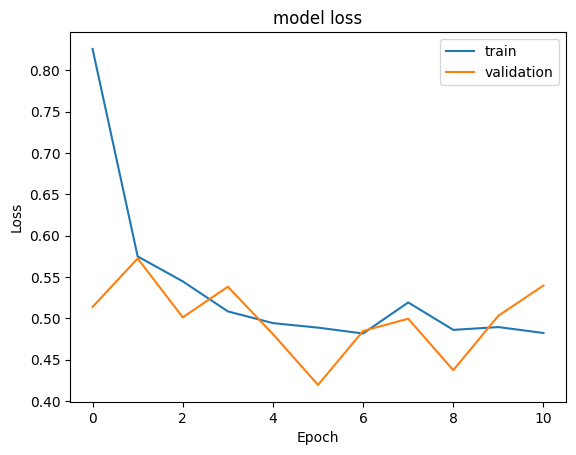

In [ ]:
# Plotting Train Loss vs Validation Loss.
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

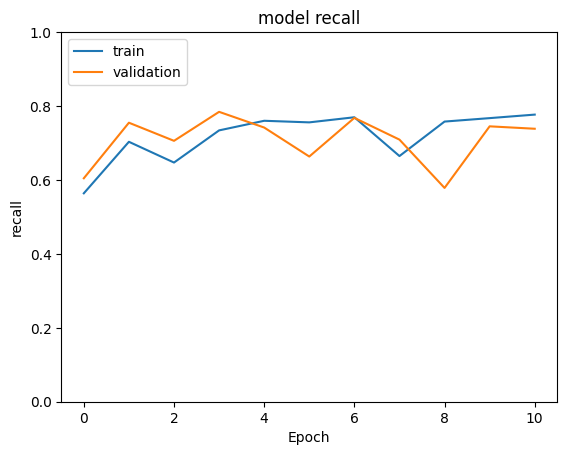

In [ ]:
# Plotting Train recall vs Validation recall.
plt.plot(history5.history['recall'])
plt.plot(history5.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0, 1)
plt.show()

349/349 [==============================] - 1s 1ms/step
Best Threshold=0.470095, G-Mean=0.786


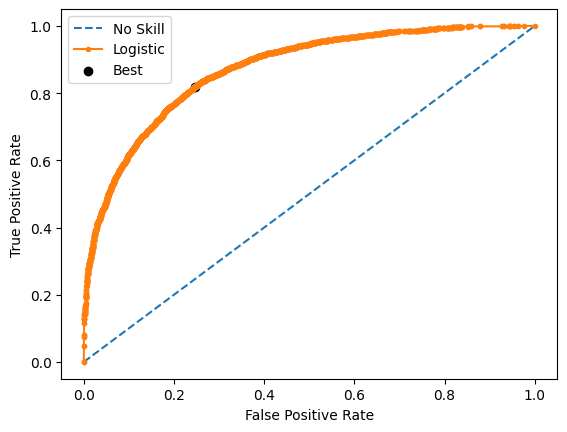

In [ ]:
# Predicting probabilities.
yhat5 = model5.predict(X_train_sm)
# Keeping probabilities for the positive outcome only.
yhat5 = yhat5[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds5 = roc_curve(y_train_sm, yhat5)
# Calculating the g-mean for each threshold.
gmeans5 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [ ]:
# Predicting the results using best as a threshold.
y_train_pred5 = model5.predict(X_train_sm)
y_train_pred5 = (y_train_pred5 > thresholds5[ix])
y_train_pred5

349/349 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
# Predicting the results using best as a threshold.
y_val_pred5 = model5.predict(X_val)
y_val_pred5 = (y_val_pred5 > thresholds5[ix])
y_val_pred5

47/47 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
model_name = "NN with Balanced Data (by applying SMOTE) and Adam Optimizer"

train_metric_df.loc[model_name] = recall_score(y_train_sm,y_train_pred5)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred5)

In [ ]:
#classification report
cr=classification_report(y_train_sm,y_train_pred5)
print(cr)

              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78      5574
         1.0       0.77      0.82      0.79      5574

    accuracy                           0.79     11148
   macro avg       0.79      0.79      0.79     11148
weighted avg       0.79      0.79      0.79     11148



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred5)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83      1194
         1.0       0.44      0.77      0.56       306

    accuracy                           0.75      1500
   macro avg       0.68      0.76      0.69      1500
weighted avg       0.83      0.75      0.77      1500



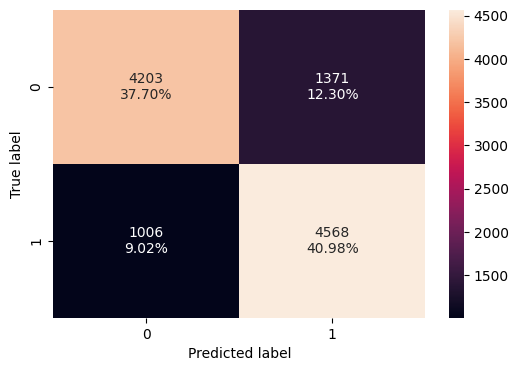

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_sm, y_train_pred5)

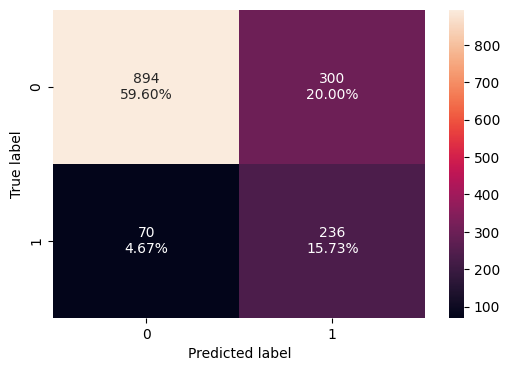

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred5)

* With a recall of 0.77, this model is less effective than Model 1

### Model Improvement: Neural Network with Balanced Data (by applying SMOTE),Adam Optimizer and Dropout

In [ ]:
# Applying SMOTE on training data to oversample data.
sm = SMOTE(sampling_strategy='not majority')
X_train_sm , y_train_sm = sm.fit_resample(X_train,y_train)
print('After resampling, the shape of X_train: {}'.format(X_train_sm.shape))
print('After resampling, the shape of y_train: {} \n'.format(y_train_sm.shape))

After resampling, the shape of X_train: (11148, 11)
After resampling, the shape of y_train: (11148,) 



In [ ]:
# Checking value counts of y_train before oversampling.
unique_values, counts = np.unique(y_train, return_counts=True)
value_counts = dict(zip(unique_values, counts))
value_counts

{0.0: 5574, 1.0: 1426}

In [ ]:
# Checking value counts of y_train_sm after oversampling.
unique_values, counts = np.unique(y_train_sm, return_counts=True)
value_counts = dict(zip(unique_values, counts))
value_counts

{0.0: 5574, 1.0: 5574}

In [ ]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [ ]:
# Creating a sequential model.
model6 = Sequential()
# Adding the input layer with 32 neurons and relu as the activation function.
model6.add(Dense(32,activation='relu',input_dim = X_train_sm.shape[1]))
# Adding the dropout.
model6.add(Dropout(0.2))
# Adding hidden layer with 16 neurons.
model6.add(Dense(16,activation='relu'))
# Adding the dropout.
model6.add(Dropout(0.1))
# Adding hidden layer with 8 neurons.
model6.add(Dense(8, activation='relu'))
# Adding the output layer.
model6.add(Dense(1, activation = 'relu'))

In [ ]:
# Printing model summary.
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [ ]:
# Defining EarlyStopping as the callback for this model.
es_cb = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer.
optimizer6 = tf.keras.optimizers.Adam(0.001)

# Compiling the model with binary cross entropy as loss and accuracy as metrics.
model6.compile(optimizer=optimizer6,loss = 'binary_crossentropy', metrics = [keras.metrics.Recall()])

# Fitting the model to training data and storing the results.
history6 = model6.fit(X_train_sm,
                      y_train_sm,
                      batch_size=64,
                      epochs=50,
                      verbose=1,
                      validation_data = (X_val,y_val),
                      callbacks=[es_cb])

Epoch 1/50
175/175 [==============================] - 2s 5ms/step - loss: 1.1470 - recall: 0.4553 - val_loss: 0.5099 - val_recall: 0.3497
Epoch 2/50
175/175 [==============================] - 1s 4ms/step - loss: 0.7375 - recall: 0.5364 - val_loss: 0.4653 - val_recall: 0.4248
Epoch 3/50
175/175 [==============================] - 1s 4ms/step - loss: 0.6736 - recall: 0.5273 - val_loss: 0.4727 - val_recall: 0.5033
Epoch 4/50
175/175 [==============================] - 1s 4ms/step - loss: 0.6310 - recall: 0.5658 - val_loss: 0.4595 - val_recall: 0.4510
Epoch 5/50
175/175 [==============================] - 1s 4ms/step - loss: 0.6103 - recall: 0.5954 - val_loss: 0.4577 - val_recall: 0.4935
Epoch 6/50
175/175 [==============================] - 1s 4ms/step - loss: 0.6069 - recall: 0.5779 - val_loss: 0.4500 - val_recall: 0.3954
Epoch 7/50
175/175 [==============================] - 1s 4ms/step - loss: 0.5847 - recall: 0.5920 - val_loss: 0.4617 - val_recall: 0.5882
Epoch 8/50
175/175 [==============

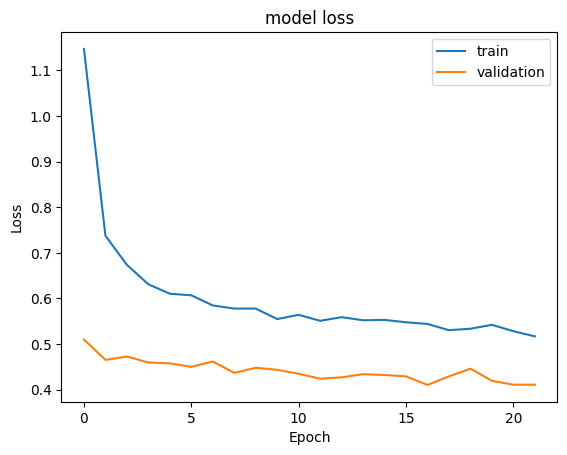

In [ ]:
# Plotting Train Loss vs Validation Loss.
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

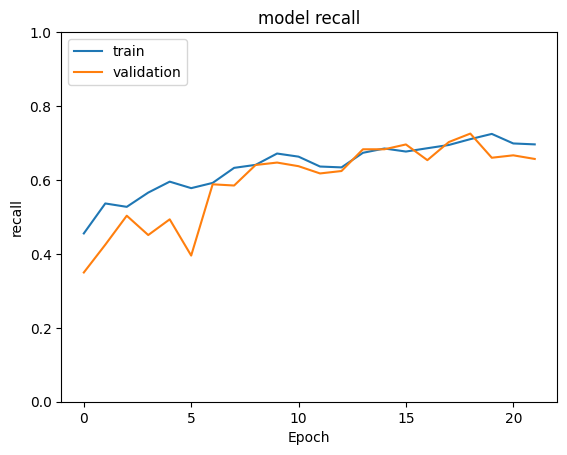

In [ ]:
# Plotting Train recall vs Validation recall.
plt.plot(history6.history['recall'])
plt.plot(history6.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0, 1)
plt.show()

349/349 [==============================] - 1s 1ms/step
Best Threshold=0.426575, G-Mean=0.783


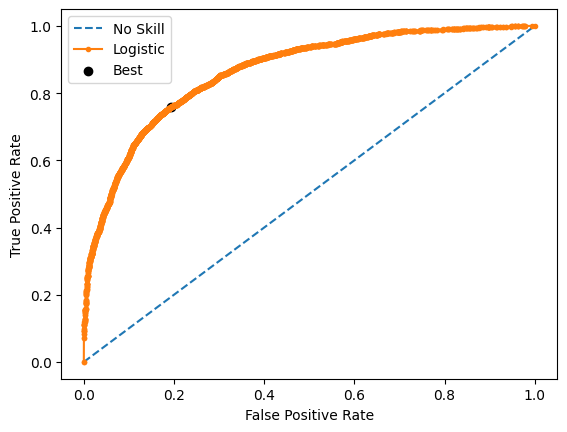

In [ ]:
# Predicting probabilities.
yhat6 = model6.predict(X_train_sm)
# Keeping probabilities for the positive outcome only.
yhat6 = yhat6[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds6 = roc_curve(y_train_sm, yhat6)
# Calculating the g-mean for each threshold.
gmeans6 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans6)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds6[ix], gmeans6[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [ ]:
# Predicting the results using best as a threshold.
y_train_pred6 = model6.predict(X_train_sm)
y_train_pred6 = (y_train_pred6 > thresholds5[ix])
y_train_pred6

349/349 [==============================] - 1s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
# Predicting the results using best as a threshold.
y_val_pred6 = model6.predict(X_val)
y_val_pred6 = (y_val_pred6 > thresholds5[ix])
y_val_pred6

47/47 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
model_name = "NN with Balanced Data (by applying SMOTE). Adam Optimizer and Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_sm,y_train_pred6)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred6)

In [ ]:
#classification report
cr=classification_report(y_train_sm,y_train_pred6)
print(cr)

              precision    recall  f1-score   support

         0.0       0.71      0.89      0.79      5574
         1.0       0.85      0.64      0.73      5574

    accuracy                           0.77     11148
   macro avg       0.78      0.77      0.76     11148
weighted avg       0.78      0.77      0.76     11148



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred6)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      1194
         1.0       0.60      0.63      0.61       306

    accuracy                           0.84      1500
   macro avg       0.75      0.76      0.75      1500
weighted avg       0.84      0.84      0.84      1500



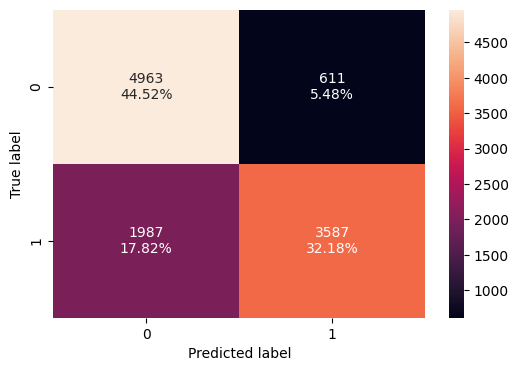

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_sm, y_train_pred6)

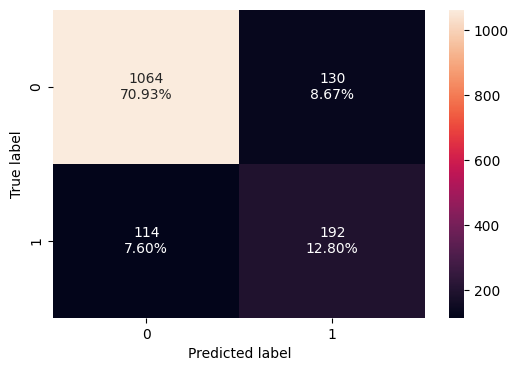

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred6)

* With a recall of 0.63, this model is less effective than Model 1

## <span style="color:blue">Model Performance Comparison and Final Model Selection

**Training performance comparison**

In [ ]:
train_metric_df

,recall
NN with SGD,0.432
NN with Adam Optimizer,0.814
NN with Adam Optimizer and Dropout,0.809
NN with Balanced Data (by applying SMOTE) and SGD Optimizer,0.681
NN with Balanced Data (by applying SMOTE) and Adam Optimizer,0.820
NN with Balanced Data (by applying SMOTE). Adam Optimizer and Dropout,0.644


**Validation set performance comparison**

In [ ]:
valid_metric_df

,recall
NN with SGD,0.422
NN with Adam Optimizer,0.810
NN with Adam Optimizer and Dropout,0.765
NN with Balanced Data (by applying SMOTE) and SGD Optimizer,0.706
NN with Balanced Data (by applying SMOTE) and Adam Optimizer,0.771
NN with Balanced Data (by applying SMOTE). Adam Optimizer and Dropout,0.627


**Training & Validation performance difference**

In [ ]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.010
NN with Adam Optimizer,0.004
NN with Adam Optimizer and Dropout,0.044
NN with Balanced Data (by applying SMOTE) and SGD Optimizer,-0.025
NN with Balanced Data (by applying SMOTE) and Adam Optimizer,0.048
NN with Balanced Data (by applying SMOTE). Adam Optimizer and Dropout,0.016


## <span style="color:blue">Final Model

* The Neural Network with Adam optimizer was chosen as final model as this model has the highest recall score in validation set.
* As previously noted before model building, a high recall score is best for the banks needs.

In [ ]:
# Creating variable model_final to be used as the final model.
model_final = model1

219/219 [==============================] - 0s 2ms/step
Best Threshold=0.186029, G-Mean=0.800


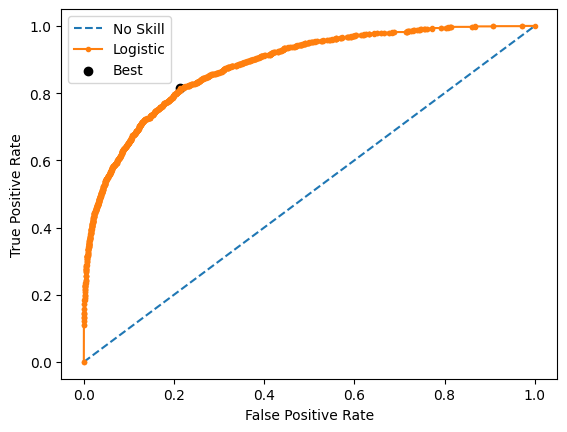

In [ ]:
# Predicting probabilities using the final model.
yhat_f = model_final.predict(X_train)
# Keeping probabilities for the positive outcome only.
yhat_f = yhat_f[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds_f = roc_curve(y_train, yhat_f)
# Calculating the g-mean for each threshold.
gmeans_f = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans_f)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_f[ix], gmeans_f[ix]))
# Plotting the roc curve for the final model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [ ]:
# Predicting the results on test data using best as a threshold.
y_test_pred_final = model_final.predict(X_test)
y_test_pred_final = (y_test_pred_final > thresholds_f[ix])
print(y_test_pred_final)

47/47 [==============================] - 0s 2ms/step
[[ True]
 [False]
 [False]
 ...
 [False]
 [False]
 [ True]]


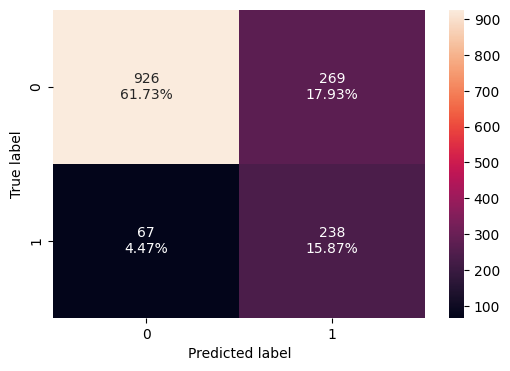

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test, y_test_pred_final)

In [ ]:
# Accuracy as per the classification report.
cr_final = sklearn.metrics.classification_report(y_test, y_test_pred_final)
print(cr_final)

              precision    recall  f1-score   support

         0.0       0.93      0.77      0.85      1195
         1.0       0.47      0.78      0.59       305

    accuracy                           0.78      1500
   macro avg       0.70      0.78      0.72      1500
weighted avg       0.84      0.78      0.79      1500



## <span style="color:blue">Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

* Utilize this final model on customer data to identify those likely to exit.
* Analyze the reasons behind the high churn rate among customers in Germany.
* Investigate the high churn rate among customers who have purchased more than two products.
* It has been observed that inactive customers leave at a higher rate than active ones. Consequently, the bank should implement programs to enhance customer engagement.

___